In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
dataset_path = "/Users/kristapsalmanis/projects/computer-vision/train"
dataset_pathh = "/Users/kristapsalmanis/projects/computer-vision/test"
batch_size = 64

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  image_size=(100,100),
  seed=123,
  batch_size=batch_size,
  color_mode='grayscale')

Found 12056 files belonging to 6 classes.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_pathh,
  image_size=(100,100),
  seed=123,
  batch_size=batch_size,
  color_mode='grayscale')

Found 3677 files belonging to 6 classes.


In [18]:
class_names = train_ds.class_names
print(class_names)

['FIVE', 'FOUR', 'NONE', 'ONE', 'THREE', 'TWO']


In [19]:
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")"""

'\nplt.figure(figsize=(10, 10))\nfor images, labels in train_ds.take(1):\n  for i in range(9):\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")\n    plt.title(class_names[labels[i]])\n    plt.axis("off")'

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128, 3, activation='relu',  input_shape=(100, 100, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation=None)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


189/189 [==============================] - 464s 2s/step - loss: 0.7854 - accuracy: 0.6656 - val_loss: 0.1658 - val_accuracy: 0.9489
Epoch 2/10
189/189 [==============================] - 522s 3s/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.1746 - val_accuracy: 0.9445
Epoch 3/10
189/189 [==============================] - 515s 3s/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.1802 - val_accuracy: 0.9554
Epoch 4/10
189/189 [==============================] - 484s 3s/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.1767 - val_accuracy: 0.9404
Epoch 5/10
189/189 [==============================] - 541s 3s/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.3505 - val_accuracy: 0.9070
Epoch 6/10
189/189 [==============================] - 515s 3s/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.2568 - val_accuracy: 0.9470
Epoch 7/10
189/189 [==============================] - 513s 3s/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.3188 - val_accuracy: 0.9396
Epoch 8/10

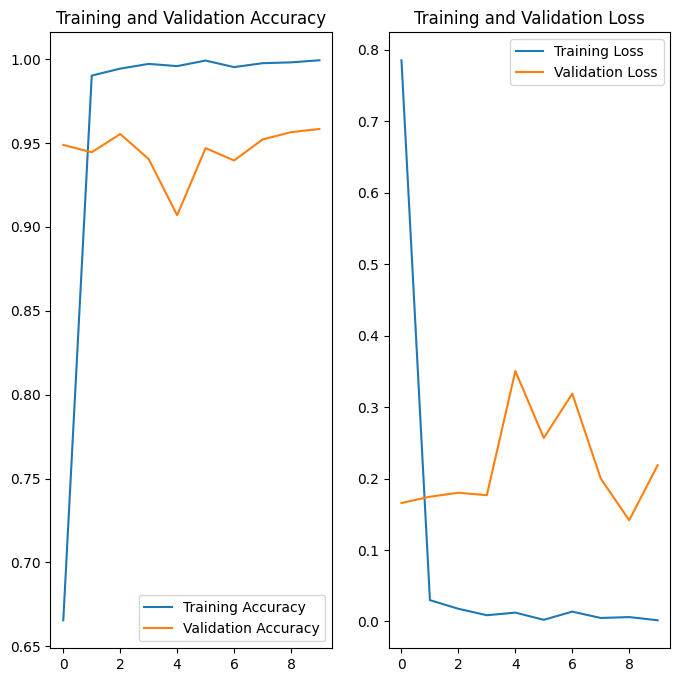

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
model.save('finger_count.h5')